<a href="https://colab.research.google.com/github/vxbrin/DataScience2-Hapiness/blob/main/Data_Science2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA

###Data


In [112]:
#Importar librerias y file
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/world_happiness_combined.csv')




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [113]:
#Ver informacion de la tabla y valores nulos
df = pd.read_csv('/content/drive/MyDrive/world_happiness_combined.csv', delimiter=';')
print(df.info())
print(df.isnull().sum())




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1502 entries, 0 to 1501
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Ranking                       1502 non-null   int64 
 1   Country                       1502 non-null   object
 2   Regional indicator            1499 non-null   object
 3   Happiness score               1502 non-null   object
 4   GDP per capita                1502 non-null   object
 5   Social support                1502 non-null   object
 6   Healthy life expectancy       1502 non-null   int64 
 7   Freedom to make life choices  1502 non-null   object
 8   Generosity                    1502 non-null   object
 9   Perceptions of corruption     1502 non-null   object
 10  Year                          1502 non-null   int64 
dtypes: int64(3), object(8)
memory usage: 129.2+ KB
None
Ranking                         0
Country                         0
Regional indic

In [114]:
#Revisar la columna regional que contiene valores vacios
print(df['Regional indicator'])


0                     Western Europe
1                     Western Europe
2                     Western Europe
3                     Western Europe
4              North America and ANZ
                    ...             
1497     Latin America and Caribbean
1498                  Southeast Asia
1499    Middle East and North Africa
1500              Sub-Saharan Africa
1501              Sub-Saharan Africa
Name: Regional indicator, Length: 1502, dtype: object


In [115]:
#Revisar la columna country que contiene valores vacios
print(df[df['Regional indicator'].isnull()]['Country'])


394    Greece
673    Cyprus
743    Gambia
Name: Country, dtype: object


In [116]:
# Completar la region correspondiente
df.loc[394, 'Regional indicator'] = 'Central and Eastern Europe'
df.loc[673, 'Regional indicator'] = 'South Asia'
df.loc[743, 'Regional indicator'] = 'Sub-Saharan Africa'

print(df.loc[[394, 673, 743], ['Regional indicator', 'Country']])


             Regional indicator Country
394  Central and Eastern Europe  Greece
673                  South Asia  Cyprus
743          Sub-Saharan Africa  Gambia


In [117]:
print(df[['Happiness score','GDP per capita', 'Social support','Freedom to make life choices','Generosity','Perceptions of corruption']])

     Happiness score GDP per capita Social support  \
0            7,58700        8,26132        0,96240   
1            7,56100        7,70416        1,00000   
2            7,52700        7,84114        0,97030   
3            7,52200        8,63100        0,94917   
4            7,42700        7,84595        0,94322   
...              ...            ...            ...   
1497         5,60670        0,00000        0,81740   
1498         6,04300        6,21579        0,78378   
1499         3,56100        3,13606        0,79273   
1500         3,50240        4,19978        0,50041   
1501         3,34110        3,49606        0,52587   

     Freedom to make life choices Generosity Perceptions of corruption  
0                         0,99379    0,37289                   0,23941  
1                         0,93884    0,54819                   0,74371  
2                         0,96962    0,42894                   0,12382  
3                         1,00000    0,43598               

In [118]:
#Cambiar formato de columnas a número
for col in ['Happiness score','GDP per capita', 'Social support','Freedom to make life choices','Generosity','Perceptions of corruption']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

print(df.info())
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1502 entries, 0 to 1501
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ranking                       1502 non-null   int64  
 1   Country                       1502 non-null   object 
 2   Regional indicator            1502 non-null   object 
 3   Happiness score               0 non-null      float64
 4   GDP per capita                0 non-null      float64
 5   Social support                0 non-null      float64
 6   Healthy life expectancy       1502 non-null   int64  
 7   Freedom to make life choices  0 non-null      float64
 8   Generosity                    0 non-null      float64
 9   Perceptions of corruption     0 non-null      float64
 10  Year                          1502 non-null   int64  
dtypes: float64(6), int64(3), object(2)
memory usage: 129.2+ KB
None
Ranking                            0
Country             

In [119]:
display(df.describe())


,Ranking,Happiness score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Year
count,1502.000000,0.0,0.0,0.0,1502.000000,0.0,0.0,0.0,1502.000000
mean,76.035286,NaN,NaN,NaN,66.670439,NaN,NaN,NaN,2019.374834
std,43.865013,NaN,NaN,NaN,7.671376,NaN,NaN,NaN,2.856316
min,1.000000,NaN,NaN,NaN,39.000000,NaN,NaN,NaN,2015.000000
25%,38.000000,NaN,NaN,NaN,62.000000,NaN,NaN,NaN,2017.000000
50%,76.000000,NaN,NaN,NaN,68.000000,NaN,NaN,NaN,2019.000000
75%,114.000000,NaN,NaN,NaN,72.000000,NaN,NaN,NaN,2022.000000
max,158.000000,NaN,NaN,NaN,85.000000,NaN,NaN,NaN,2024.000000


###Convertir valores a numeros con extra ayuda

In [120]:
# prompt: para 'Happiness score','GDP per capita', 'Social support','Freedom to make life choices','Generosity','Perceptions of corruption' cambiar las comas por puntos hasta que se vean sus estadisticos.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

# # EDA
# ###Data

drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/world_happiness_combined.csv', delimiter=';') # Assuming semicolon delimiter

print(df.info())
print(df.isnull().sum())

print(df['Regional indicator'])

df['Regional indicator'] = df['Regional indicator'].fillna('Other')
print(df.isnull().sum())

# Replacing commas with periods in specified columns
for col in ['Happiness score','GDP per capita', 'Social support','Freedom to make life choices','Generosity','Perceptions of corruption']:
    df[col] = df[col].astype(str).str.replace(',', '.') # Convert to string first to handle potential errors


# Convert to numeric after comma replacement
for col in ['Happiness score','GDP per capita', 'Social support','Freedom to make life choices','Generosity','Perceptions of corruption']:
    df[col] = pd.to_numeric(df[col], errors='coerce')


print(df.info())
print(df.isnull().sum())

display(df.describe())


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1502 entries, 0 to 1501
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Ranking                       1502 non-null   int64 
 1   Country                       1502 non-null   object
 2   Regional indicator            1499 non-null   object
 3   Happiness score               1502 non-null   object
 4   GDP per capita                1502 non-null   object
 5   Social support                1502 non-null   object
 6   Healthy life expectancy       1502 non-null   int64 
 7   Freedom to make life choices  1502 non-null   object
 8   Generosity                    1502 non-null   object
 9   Perceptions of corruption     1502 non-null   object
 10  Year                          1502 non-null   int64 
dtypes: in

,Ranking,Happiness score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Year
count,1502.000000,1502.000000,1502.000000,1502.000000,1502.000000,1502.000000,1502.000000,1502.000000,1502.000000
mean,76.035286,5.448857,6.107178,0.691842,66.670439,0.658935,0.320369,0.452764,2019.374834
std,43.865013,1.125638,2.499571,0.212647,7.671376,0.216441,0.172669,0.321786,2.856316
min,1.000000,1.721000,0.000000,0.000000,39.000000,0.000000,0.000000,0.000000,2015.000000
25%,38.000000,4.593425,4.375967,0.564507,62.000000,0.535942,0.196085,0.158585,2017.000000
50%,76.000000,5.469650,6.305600,0.738190,68.000000,0.690305,0.296375,0.345325,2019.000000
75%,114.000000,6.278450,8.047867,0.861528,72.000000,0.831792,0.430042,0.782560,2022.000000
max,158.000000,7.842100,10.000000,1.000000,85.000000,1.000000,1.000000,1.000000,2024.000000


##Data Visualization ana Analysis




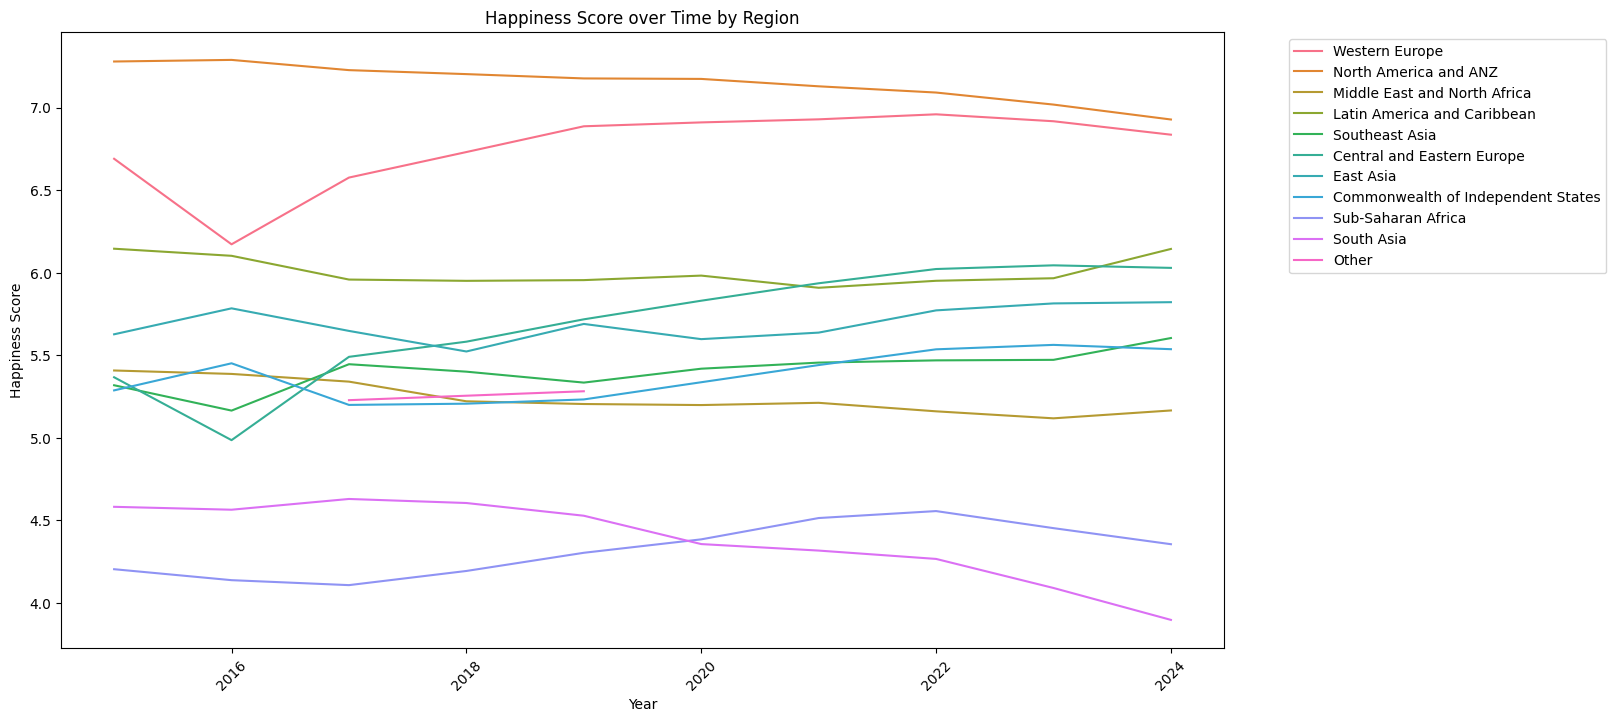

In [121]:
#Crear un grafico que muestre happiness score por años en las regiones

plt.figure(figsize=(15, 8))
sns.lineplot(x='Year', y='Happiness score', hue='Regional indicator', data=df, errorbar=None)
plt.title('Happiness Score over Time by Region')
plt.xlabel('Year')
plt.ylabel('Happiness Score')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()



In [157]:
#Ver qué regiones tienen el menor y mayor crecimiento para analizarlas

regional_happiness = df.groupby(['Regional indicator', 'Year'])['Happiness score'].mean().unstack()

initial_happiness = regional_happiness.iloc[:, 0]
final_happiness = regional_happiness.iloc[:, -1]

happiness_diff = final_happiness - initial_happiness

results_df = pd.DataFrame({'Initial Happiness': initial_happiness,
                           'Final Happiness': final_happiness,
                           'Difference': happiness_diff})

largest_diff_region = results_df['Difference'].idxmax()
smallest_diff_region = results_df['Difference'].idxmin()

print(results_df)
print("\nRegion with the largest increase in happiness:", largest_diff_region)
print("Region with the smallest increase in happiness:", smallest_diff_region)


                                    Initial Happiness  Final Happiness  \
Regional indicator                                                       
Central and Eastern Europe                   5.365824         6.028571   
Commonwealth of Independent States           5.286333         5.535913   
East Asia                                    5.626167         5.820771   
Latin America and Caribbean                  6.144682         6.143368   
Middle East and North Africa                 5.406900         5.164663   
North America and ANZ                        7.279000         6.927625   
Other                                             NaN              NaN   
South Asia                                   4.580857         3.895700   
Southeast Asia                               5.317444         5.603525   
Sub-Saharan Africa                           4.202800         4.354306   
Western Europe                               6.689619         6.835591   

                                    D

<ipython-input-152-eeada39bcbd7>:43: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  diff_df = pd.concat([diff_df, pd.DataFrame({'Variable': [var], 'Initial': [initial_value], 'Final': [final_value], 'Difference': [difference]})], ignore_index=True)


,Variable,Initial,Final,Difference
0,GDP per capita,1.891970,2.934510,-1.042540
1,Social support,0.215980,0.000000,0.215980
2,Freedom to make life choices,0.349600,0.000000,0.349600
3,Generosity,0.458740,0.226380,0.232360
4,Perceptions of corruption,0.823910,0.153830,0.670080


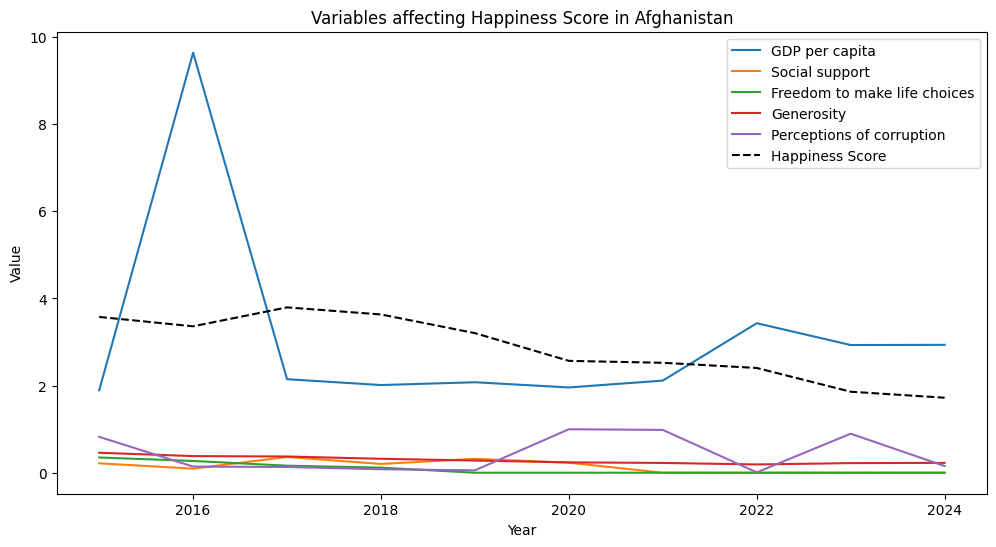

<ipython-input-152-eeada39bcbd7>:43: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  diff_df = pd.concat([diff_df, pd.DataFrame({'Variable': [var], 'Initial': [initial_value], 'Final': [final_value], 'Difference': [difference]})], ignore_index=True)


,Variable,Initial,Final,Difference
0,GDP per capita,3.815580,5.448090,-1.632510
1,Social support,0.272230,0.403750,-0.131520
2,Freedom to make life choices,0.594060,0.887950,-0.293890
3,Generosity,0.332650,0.433930,-0.101280
4,Perceptions of corruption,0.846140,0.212170,0.633970


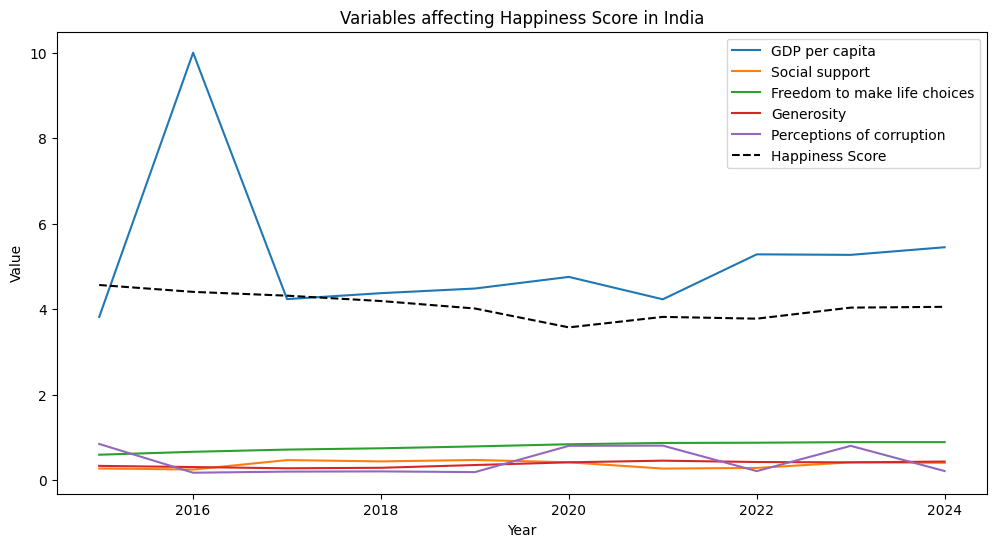

<ipython-input-152-eeada39bcbd7>:43: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  diff_df = pd.concat([diff_df, pd.DataFrame({'Variable': [var], 'Initial': [initial_value], 'Final': [final_value], 'Difference': [difference]})], ignore_index=True)


,Variable,Initial,Final,Difference
0,GDP per capita,2.351660,5.239880,-2.888220
1,Social support,0.307410,0.154140,0.153270
2,Freedom to make life choices,0.609500,0.897520,-0.288020
3,Generosity,0.266640,0.350250,-0.083610
4,Perceptions of corruption,0.772260,0.291150,0.481110


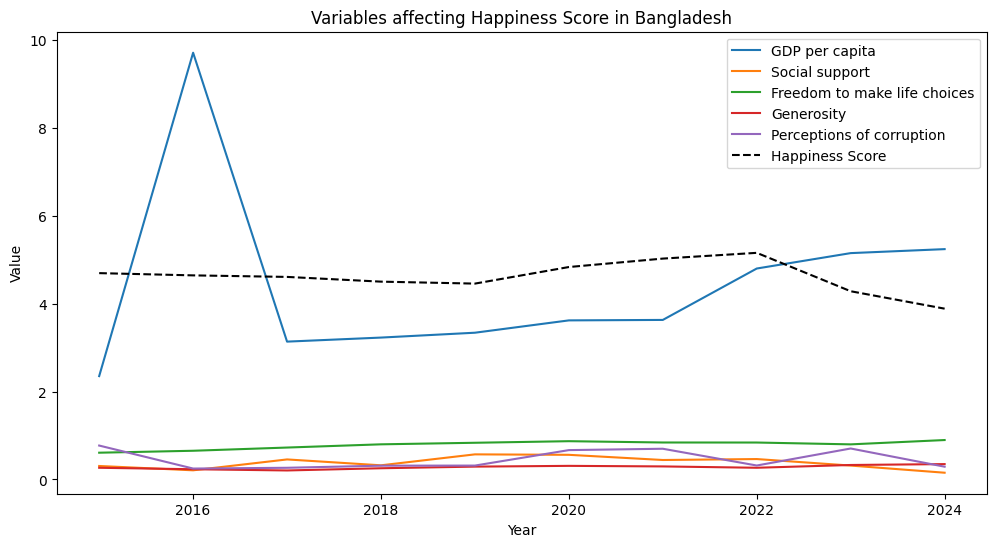

<ipython-input-152-eeada39bcbd7>:43: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  diff_df = pd.concat([diff_df, pd.DataFrame({'Variable': [var], 'Initial': [initial_value], 'Final': [final_value], 'Difference': [difference]})], ignore_index=True)


,Variable,Initial,Final,Difference
0,GDP per capita,4.941020,6.358140,-1.417120
1,Social support,0.726740,0.729140,-0.002400
2,Freedom to make life choices,0.802200,0.675360,0.126840
3,Generosity,0.512980,0.359420,0.153560
4,Perceptions of corruption,0.833700,0.053630,0.780070


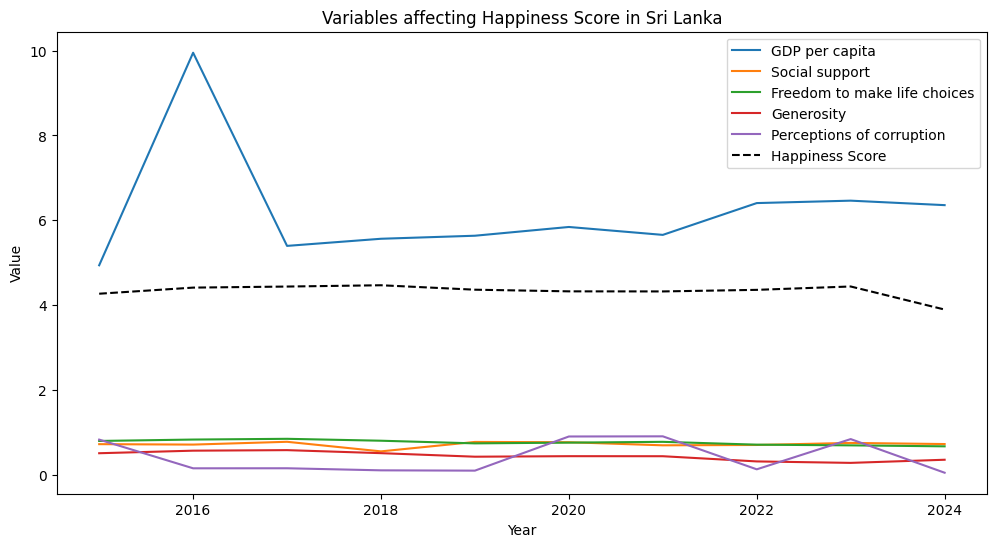

<ipython-input-152-eeada39bcbd7>:43: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  diff_df = pd.concat([diff_df, pd.DataFrame({'Variable': [var], 'Initial': [initial_value], 'Final': [final_value], 'Difference': [difference]})], ignore_index=True)


,Variable,Initial,Final,Difference
0,GDP per capita,2.129470,4.509950,-2.380480
1,Social support,0.616510,0.612540,0.003970
2,Freedom to make life choices,0.571610,0.756270,-0.184660
3,Generosity,0.405780,0.522330,-0.116550
4,Perceptions of corruption,0.892980,0.199810,0.693170


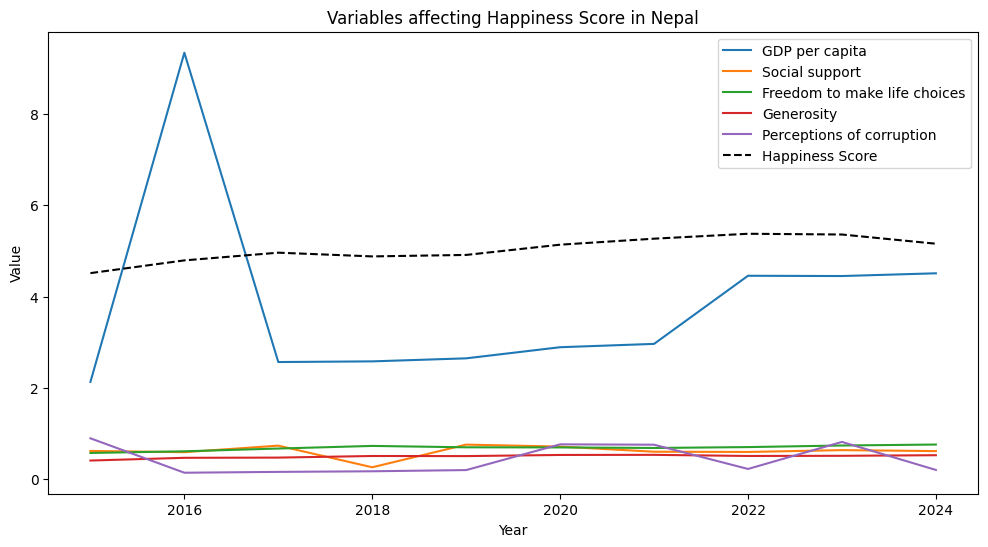

<ipython-input-152-eeada39bcbd7>:43: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  diff_df = pd.concat([diff_df, pd.DataFrame({'Variable': [var], 'Initial': [initial_value], 'Final': [final_value], 'Difference': [difference]})], ignore_index=True)


,Variable,Initial,Final,Difference
0,GDP per capita,3.522360,4.991980,-1.469620
1,Social support,0.295320,0.371400,-0.076080
2,Freedom to make life choices,0.180690,0.627740,-0.447050
3,Generosity,0.423060,0.360350,0.062710
4,Perceptions of corruption,0.810400,0.128610,0.681790


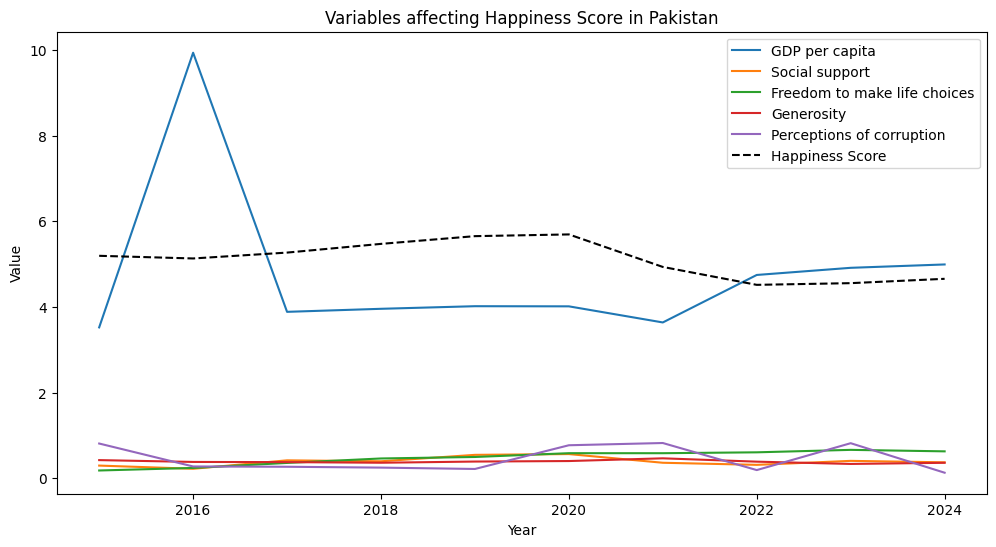

<ipython-input-152-eeada39bcbd7>:43: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  diff_df = pd.concat([diff_df, pd.DataFrame({'Variable': [var], 'Initial': [initial_value], 'Final': [final_value], 'Difference': [difference]})], ignore_index=True)


,Variable,Initial,Final,Difference
0,GDP per capita,4.557590,4.829210,-0.271620
1,Social support,0.787280,0.813450,-0.026170
2,Freedom to make life choices,0.794440,0.723240,0.071200
3,Generosity,0.603080,0.654770,-0.051690
4,Perceptions of corruption,0.720160,0.369370,0.350790


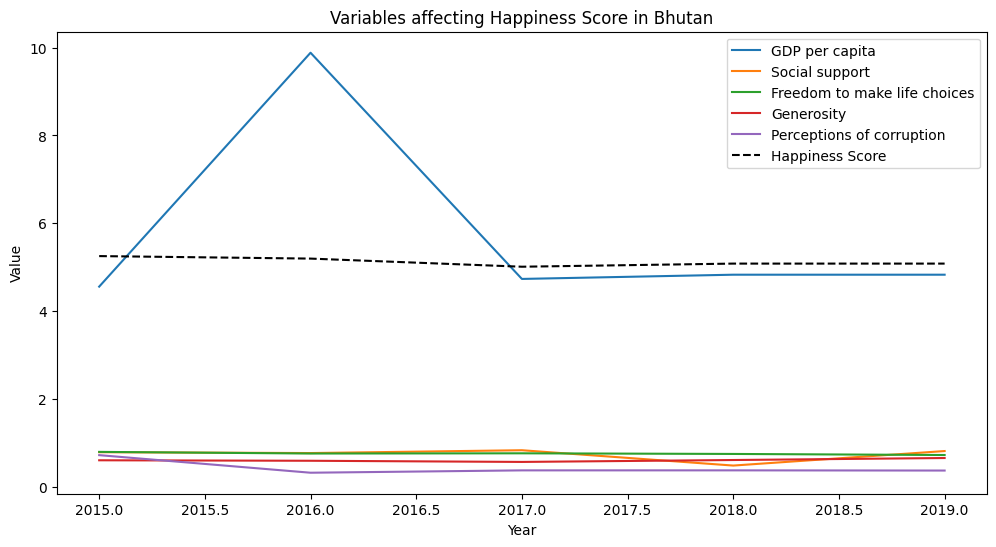

In [152]:
#Analizar las variables de la región que mas decreció el happiness score a través del tiempo por país.

# Filter data for South Asia
south_asia_df = df[df['Regional indicator'] == 'South Asia']

# Group data by country and year to find the lowest happiness score for each country
lowest_happiness_by_country = south_asia_df.loc[south_asia_df.groupby('Country')['Happiness score'].idxmin()]

# Sort countries by lowest happiness score
lowest_happiness_by_country = lowest_happiness_by_country.sort_values('Happiness score')

# Iterate through countries with lowest happiness score and plot variables
for country in lowest_happiness_by_country['Country']:
    country_df = south_asia_df[south_asia_df['Country'] == country]

    # Plotting variables with happiness score
    plt.figure(figsize=(12, 6))

    variables = ['GDP per capita', 'Social support', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']
    for var in variables:
        sns.lineplot(x='Year', y=var, data=country_df, label=var)

    sns.lineplot(x='Year', y='Happiness score', data=country_df, linestyle='--', color='black', label='Happiness Score')
    plt.title(f'Variables affecting Happiness Score in {country}')
    plt.xlabel('Year')
    plt.ylabel('Value')
    plt.legend()

    # Calculate initial, final, and difference for each variable
    diff_df = pd.DataFrame(columns = ['Variable', 'Initial', 'Final', 'Difference'])

    for var in variables:
        initial_value = country_df[var].iloc[0]
        final_value = country_df[var].iloc[-1]
        difference = initial_value - final_value

        diff_df = pd.concat([diff_df, pd.DataFrame({'Variable': [var], 'Initial': [initial_value], 'Final': [final_value], 'Difference': [difference]})], ignore_index=True)

    # Highlight the minimum difference
    diff_df_styled = diff_df.style.highlight_min(subset=['Difference'], color = 'lightgreen')

    # Display the table of differences
    display(diff_df_styled)

    plt.show()


<ipython-input-159-6b6bf056d941>:44: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  diff_df = pd.concat([diff_df, pd.DataFrame({'Variable': [var], 'Initial': [initial_value], 'Final': [final_value], 'Difference': [difference]})], ignore_index=True)


,Variable,Initial,Final,Difference
0,GDP per capita,6.172720,7.937470,1.764750
1,Social support,0.631760,0.764430,0.132670
2,Freedom to make life choices,0.523610,0.830000,0.306390
3,Generosity,0.172740,0.101570,-0.071170
4,Perceptions of corruption,0.988250,0.010980,-0.977270


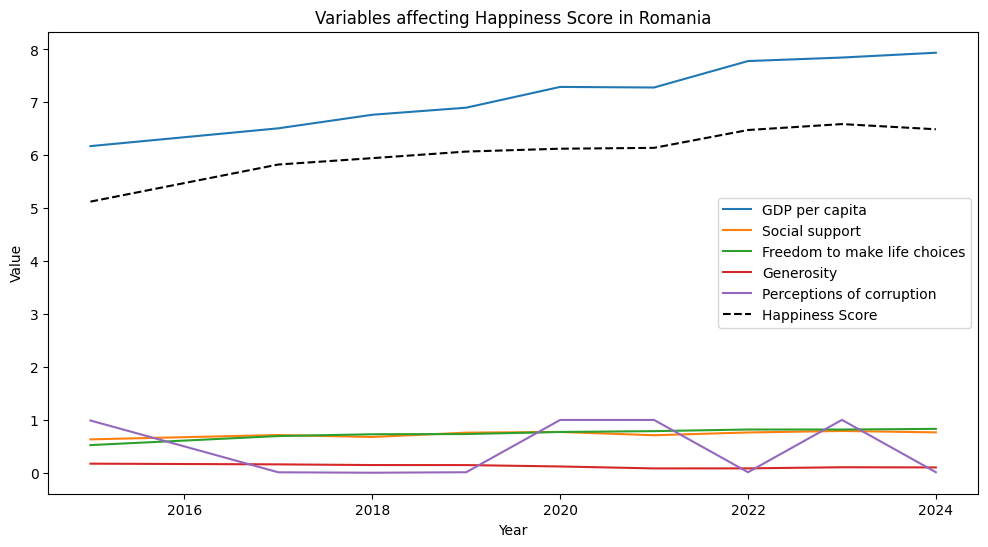

<ipython-input-159-6b6bf056d941>:44: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  diff_df = pd.concat([diff_df, pd.DataFrame({'Variable': [var], 'Initial': [initial_value], 'Final': [final_value], 'Difference': [difference]})], ignore_index=True)


,Variable,Initial,Final,Difference
0,GDP per capita,5.445580,7.184350,1.738770
1,Social support,0.720030,0.860790,0.140760
2,Freedom to make life choices,0.300220,0.768220,0.468000
3,Generosity,0.241630,0.499320,0.257690
4,Perceptions of corruption,0.952580,0.174980,-0.777600


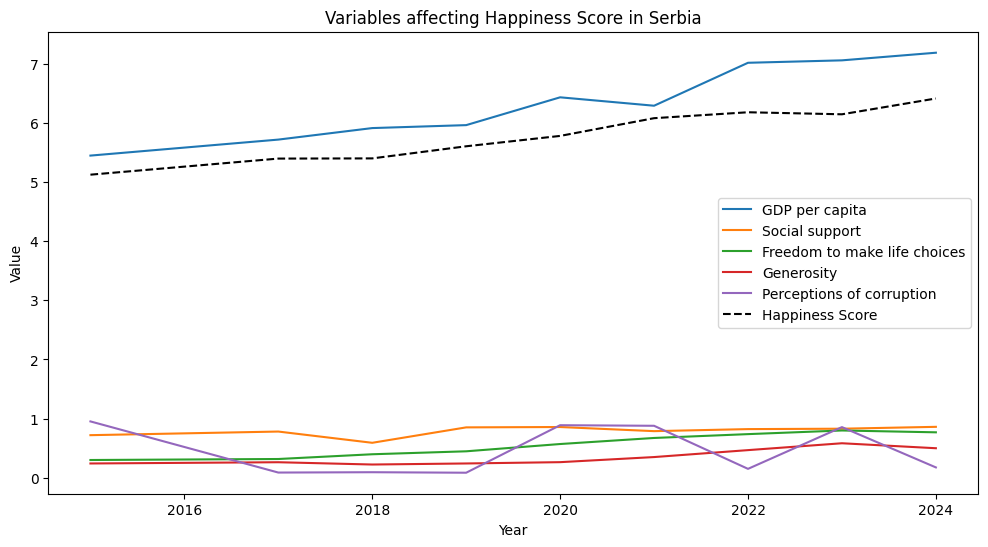

<ipython-input-159-6b6bf056d941>:44: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  diff_df = pd.concat([diff_df, pd.DataFrame({'Variable': [var], 'Initial': [initial_value], 'Final': [final_value], 'Difference': [difference]})], ignore_index=True)


,Variable,Initial,Final,Difference
0,GDP per capita,5.987620,7.612090,1.624470
1,Social support,0.788840,0.908600,0.119760
2,Freedom to make life choices,0.456710,0.718610,0.261900
3,Generosity,0.149780,0.207800,0.058020
4,Perceptions of corruption,0.984200,0.010690,-0.973510


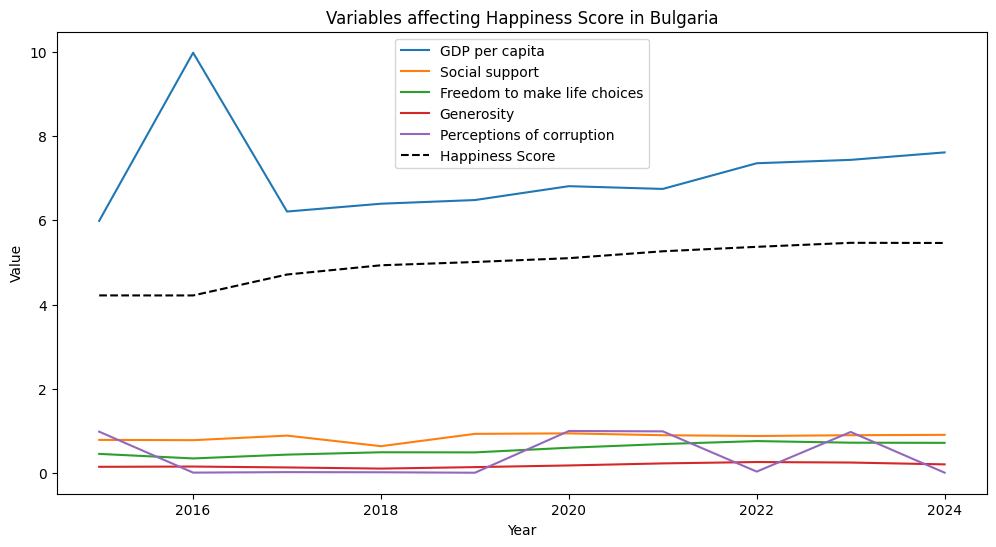

In [159]:
#Analizar las variables de la región que mas creció el happiness score a través del tiempo por país.

# Filter data for Central and Eastern Europe
central_eastern_europe_df = df[df['Regional indicator'] == 'Central and Eastern Europe']

# Group data by country and year
country_year_data = central_eastern_europe_df.groupby(['Country', 'Year']).agg({
    'Happiness score': 'mean',
    'GDP per capita': 'mean',
    'Social support': 'mean',
    'Freedom to make life choices': 'mean',
    'Generosity': 'mean',
    'Perceptions of corruption': 'mean'
}).reset_index()


# Calculate happiness score change for each country
happiness_change = country_year_data.groupby('Country')['Happiness score'].agg(lambda x: x.iloc[-1] - x.iloc[0]).sort_values(ascending=False)

# Select the top 3 countries with the largest increase in happiness score
top_3_countries = happiness_change.head(3).index

for country in top_3_countries:
    country_df = country_year_data[country_year_data['Country'] == country]

    plt.figure(figsize=(12, 6))

    variables = ['GDP per capita', 'Social support', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']
    for var in variables:
        sns.lineplot(x='Year', y=var, data=country_df, label=var)

    sns.lineplot(x='Year', y='Happiness score', data=country_df, linestyle='--', color='black', label='Happiness Score')
    plt.title(f'Variables affecting Happiness Score in {country}')
    plt.xlabel('Year')
    plt.ylabel('Value')
    plt.legend()

    # Calculate initial, final and difference for each variable
    diff_df = pd.DataFrame(columns=['Variable', 'Initial', 'Final', 'Difference'])
    for var in variables:
        initial_value = country_df[var].iloc[0]
        final_value = country_df[var].iloc[-1]
        difference = final_value - initial_value
        diff_df = pd.concat([diff_df, pd.DataFrame({'Variable': [var], 'Initial': [initial_value], 'Final': [final_value], 'Difference': [difference]})], ignore_index=True)

    # Highlight the maximum difference
    diff_df_styled = diff_df.style.highlight_max(subset=['Difference'], color='lightgreen')
    display(diff_df_styled)
    plt.show()


Region with highest average happiness: North America and ANZ


,Variable,Mean Difference
0,GDP per capita,2.427386
1,Social support,0.225072
3,Generosity,0.224140
2,Freedom to make life choices,0.219629
4,Perceptions of corruption,0.072425


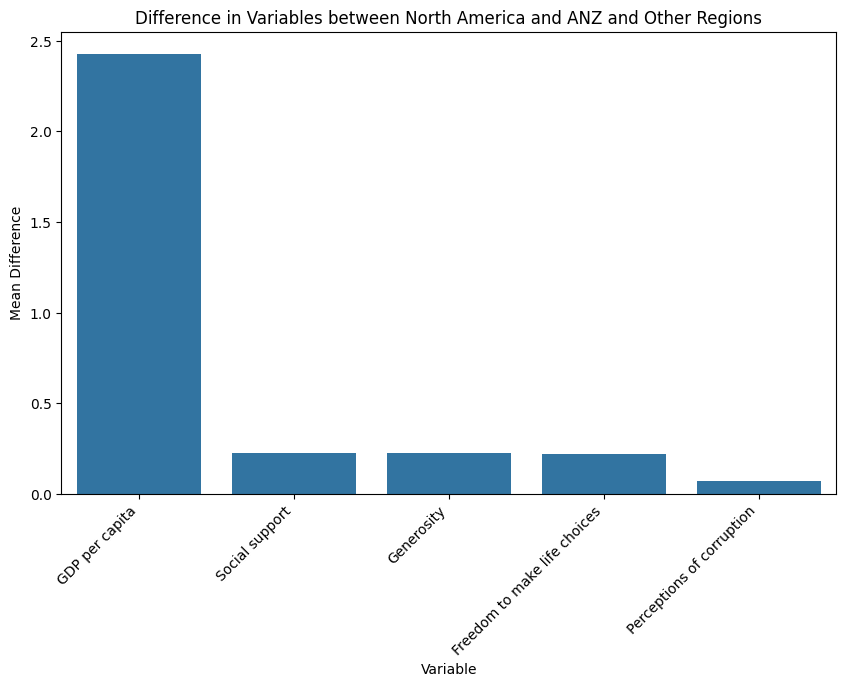

In [191]:
#Analizar la region con mejor happines score y ver las diferencias en relacion a las demás.

# Find the region with the highest average happiness score
region_happiness = df.groupby('Regional indicator')['Happiness score'].mean()
highest_happiness_region = region_happiness.idxmax()

print(f"Region with highest average happiness: {highest_happiness_region}")

# Compare the highest happiness region to others
highest_happiness_data = df[df['Regional indicator'] == highest_happiness_region]
other_regions_data = df[df['Regional indicator'] != highest_happiness_region]

# Calculate the mean difference for each variable
variables = ['GDP per capita', 'Social support', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']
differences = {}
for var in variables:
  differences[var] = highest_happiness_data[var].mean() - other_regions_data[var].mean()


# Create DataFrame to display the results
differences_df = pd.DataFrame({'Variable': variables, 'Mean Difference': list(differences.values())})
differences_df = differences_df.sort_values(by='Mean Difference', ascending=False)

display(differences_df)


# Visualization of differences (optional)
plt.figure(figsize=(10, 6))
sns.barplot(x='Variable', y='Mean Difference', data=differences_df)
plt.title(f'Difference in Variables between {highest_happiness_region} and Other Regions')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Variable')
plt.ylabel('Mean Difference')
plt.show()
